In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [66]:
car_df = pd.read_csv('car_price_dataset_medium.csv')
car_df.head()

# 
car_df.rename(columns={'Price_USD': 'Price'}, inplace=True)
car_df.head()

,Car_ID,Brand,Model_Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine_CC,Max_Power_bhp,Mileage_kmpl,Seats,Price
0,1,Audi,2005,197018,Diesel,Manual,First,4046,223.6,29.61,6,119611.94
1,2,BMW,2019,43467,Hybrid,Automatic,First,3731,248.4,21.66,5,90842.46
2,3,Kia,2012,153697,Hybrid,Automatic,Third,4925,465.5,12.14,6,78432.24
3,4,Mercedes,2015,38893,Petrol,Automatic,Second,3771,229.7,19.65,6,44568.89
4,5,Audi,2016,81329,Hybrid,Automatic,First,2817,573.2,7.74,5,8751.82


In [67]:
car_df[['Model_Year', 'Price']].head()

,Model_Year,Price
0,2005,119611.94
1,2019,90842.46
2,2012,78432.24
3,2015,44568.89
4,2016,8751.82


In [49]:
# lets notedown all the columns present in the dataset
car_df.columns

# Index(['Car_ID', 'Brand', 'Model_Year', 'Kilometers_Driven', 'Fuel_Type',
#        'Transmission', 'Owner_Type', 'Engine_CC', 'Max_Power_bhp',
#        'Mileage_kmpl', 'Seats', 'Price'],
#       dtype='object')


# data definition
# Car_ID: Unique identifier for each car
# Brand: Manufacturer of the car (e.g., Toyota, Ford, BMW)
# Model_Year: Year the car model was manufactured
# Kilometers_Driven: Total distance the car has been driven (in kilometers)
# Fuel_Type: Type of fuel the car uses (e.g., Petrol, Diesel, Electric)
# Transmission: Type of transmission (e.g., Manual, Automatic)
# Owner_Type: Type of ownership (e.g., First Owner, Second Owner)
# Engine_CC: Engine capacity in cubic centimeters (CC)
# Max_Power_bhp: Maximum power output of the car in brake horsepower (bhp)
# Mileage_kmpl: Fuel efficiency in kilometers per liter (kmpl)
# Seats: Number of seats in the car
# Price: Selling price of the car in USD

Index(['Car_ID', 'Brand', 'Model_Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Engine_CC', 'Max_Power_bhp',
       'Mileage_kmpl', 'Seats', 'Price'],
      dtype='object')

In [50]:
# lets analyze brand vs price relationship
# avg sales price per brand
brand_price = car_df.groupby('Brand')['Price'].mean().sort_values(ascending=False)
brand_price

Brand
Mercedes      64344.239907
Nissan        64089.937473
Audi          62351.394043
Ford          59953.021364
Toyota        58964.422288
Hyundai       58818.596354
Honda         57226.331687
Kia           56090.171700
Volkswagen    55987.339720
BMW           54154.605532
Name: Price, dtype: float64

In [51]:
# Problem statement:
# Predict the selling price of a used car based on its features such as brand, model year, kilometers driven, fuel type, transmission, owner type, engine capacity, max power, mileage,

# Formulate your PS to machine learning problem statement
# This is a regression problem as the target variable 'Price' is continuous in nature.

In [52]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_ID             1000 non-null   int64  
 1   Brand              1000 non-null   object 
 2   Model_Year         1000 non-null   int64  
 3   Kilometers_Driven  1000 non-null   int64  
 4   Fuel_Type          1000 non-null   object 
 5   Transmission       1000 non-null   object 
 6   Owner_Type         1000 non-null   object 
 7   Engine_CC          1000 non-null   int64  
 8   Max_Power_bhp      1000 non-null   float64
 9   Mileage_kmpl       1000 non-null   float64
 10  Seats              1000 non-null   int64  
 11  Price              1000 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 93.9+ KB


In [68]:
# remove carid column as it is not useful for prediction
car_df.drop(columns=['Car_ID', 'Model_Year'], inplace=True)

In [54]:
# lets do some feature engineering
# lets creaste columns based on engine cc, max power and mileage
# car_df['Engine_CC_bin'] = pd.cut(car_df['Engine_CC'], bins=[0, 1000, 1500, 2000, 3000, 5000], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
# car_df['Max_Power_bhp_bin'] = pd.cut(car_df['Max_Power_bhp'], bins=[0, 50, 100, 150, 200, 500], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
# car_df['Mileage_kmpl_bin'] = pd.cut(car_df['Mileage_kmpl'], bins=[0, 10, 15, 20, 30, 50], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
# car_df.head()

In [55]:
# lets remove the original columns after binning
# car_df.drop(columns=['Engine_CC', 'Max_Power_bhp', 'Mileage_kmpl'], inplace=True)

In [69]:
car_df = pd.get_dummies(car_df, drop_first=True)
car_df.head()

,Kilometers_Driven,Engine_CC,Max_Power_bhp,Mileage_kmpl,Seats,Price,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes,Brand_Nissan,Brand_Toyota,Brand_Volkswagen,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second,Owner_Type_Third
0,197018,4046,223.6,29.61,6,119611.94,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,43467,3731,248.4,21.66,5,90842.46,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,153697,4925,465.5,12.14,6,78432.24,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True
3,38893,3771,229.7,19.65,6,44568.89,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False
4,81329,2817,573.2,7.74,5,8751.82,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [70]:
# so if you have categorical variables you can either do label encoding or one hot encoding
# here we will do one hot encoding for categorical variables
car_df = pd.get_dummies(car_df, drop_first=True)

# Rule for KNN regression
# 1. Your data should be in numerical format
# 2. Feature scaling is important for KNN algorithm
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# lets break data into train and test
X = car_df.drop(columns=['Price'])
y = car_df['Price']

#numerical features
numerical_col = ['Kilometers_Driven', 'Engine_CC', 'Max_Power_bhp', 'Mileage_kmpl', 'Seats']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
# fit scaler on training data
X_train_scaled = scaler.fit_transform(X_train[numerical_col])
X_test_scaled = scaler.transform(X_test[numerical_col])

# let me save the scaler object
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [71]:
# lets try to build base model with K=5
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)

y_pred = knn_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mape = np.sqrt(mse)
mape

np.float64(34396.38268877855)

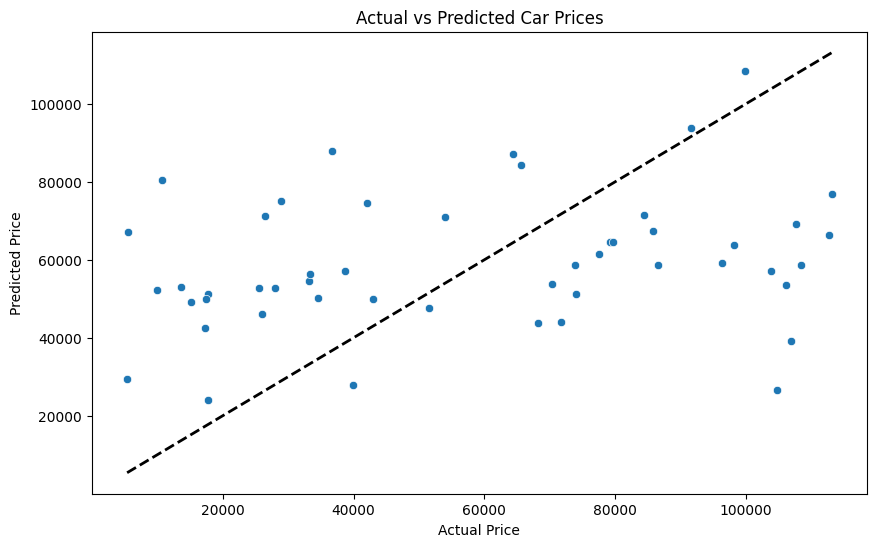

In [72]:
test_copy = X_test.copy()
test_copy['Actual_Price'] = y_test
test_copy['Predicted_Price'] = y_pred
test_copy[['Actual_Price', 'Predicted_Price']].head()

# lets plot actual vs predicted prices
plt.figure(figsize=(10,6))
sns.scatterplot(x=test_copy['Actual_Price'], y=test_copy['Predicted_Price'])
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.plot([test_copy['Actual_Price'].min(), test_copy['Actual_Price'].max()],
         [test_copy['Actual_Price'].min(), test_copy['Actual_Price'].max()], 'k--', lw=2)
plt.show()

In [73]:
# lets try to reduce the mape by tuning the K value
# lets import GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21), 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
grid_search.best_params_

{'n_neighbors': np.int64(18), 'weights': 'uniform'}

In [74]:
# lets train KNN regression model with best params
knn_reg = KNeighborsRegressor(n_neighbors=17, weights='uniform')
knn_reg.fit(X_train_scaled, y_train)

y_pred = knn_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mape = np.sqrt(mse)
mape

np.float64(35588.82170148758)

In [75]:
# save the model
with open('knn_reg_model.pkl', 'wb') as f:
    pickle.dump(knn_reg, f)

In [76]:
# single prediction
# load the model
with open('knn_reg_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
# load the scaler
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# sample input
sample_data = {
    'Kilometers_Driven': 50000,
    'Engine_CC': 1500,
    'Max_Power_bhp': 100,
    'Mileage_kmpl': 18,
    'Seats': 5,
    'Brand_BMW': 0,
    'Brand_Ford': 0,
    'Brand_Honda': 1,
    'Brand_Toyota': 0,
    'Fuel_Type_Diesel': 0,
    'Fuel_Type_Petrol': 1,
    'Transmission_Manual': 1,
    'Owner_Type_Second Owner': 0,
    'Owner_Type_Third Owner': 0,
    'Owner_Type_Fourth & Above Owner': 0
}
numerical_col = ['Kilometers_Driven', 'Engine_CC', 'Max_Power_bhp', 'Mileage_kmpl', 'Seats']
sample_df = pd.DataFrame([sample_data])
# scale the sample data
sample_scaled = loaded_scaler.transform(sample_df[numerical_col])
# predict the price
predicted_price = loaded_model.predict(sample_scaled)
predicted_price

array([59377.25823529])

In [77]:
len(sample_data)

15